# Dataset Loading

We're going to use the roboflow dataset I've made myself from scratch: ***D6 dices with numbers on the sides***

https://universe.roboflow.com/test-pxksd/d6-dices-with-numbers-on-the-sides

You may consider a few options how to get the data to have an experiment with:

* Download it manually from the link
* Use the roboflow API to download the dataset
* Download annotated for YOLOV8 dataset at kaggle: *COMING SOON*

In [1]:
from IPython.display import clear_output, Image

In [2]:
!curl -L "https://app.roboflow.com/ds/29blVU9hBX?key=5k5B9RiBcV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
clear_output()

# YOLOV8 Installation

YOLOv8 is a state-of-the-art object detection and image segmentation model created by Ultralytics, the developers of YOLOv5.

You can find all the necessary information about the architecture here: https://github.com/ultralytics/ultralytics

In [3]:
!pip install ultralytics==8.0.20

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=50 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 135MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

# Training results visualization

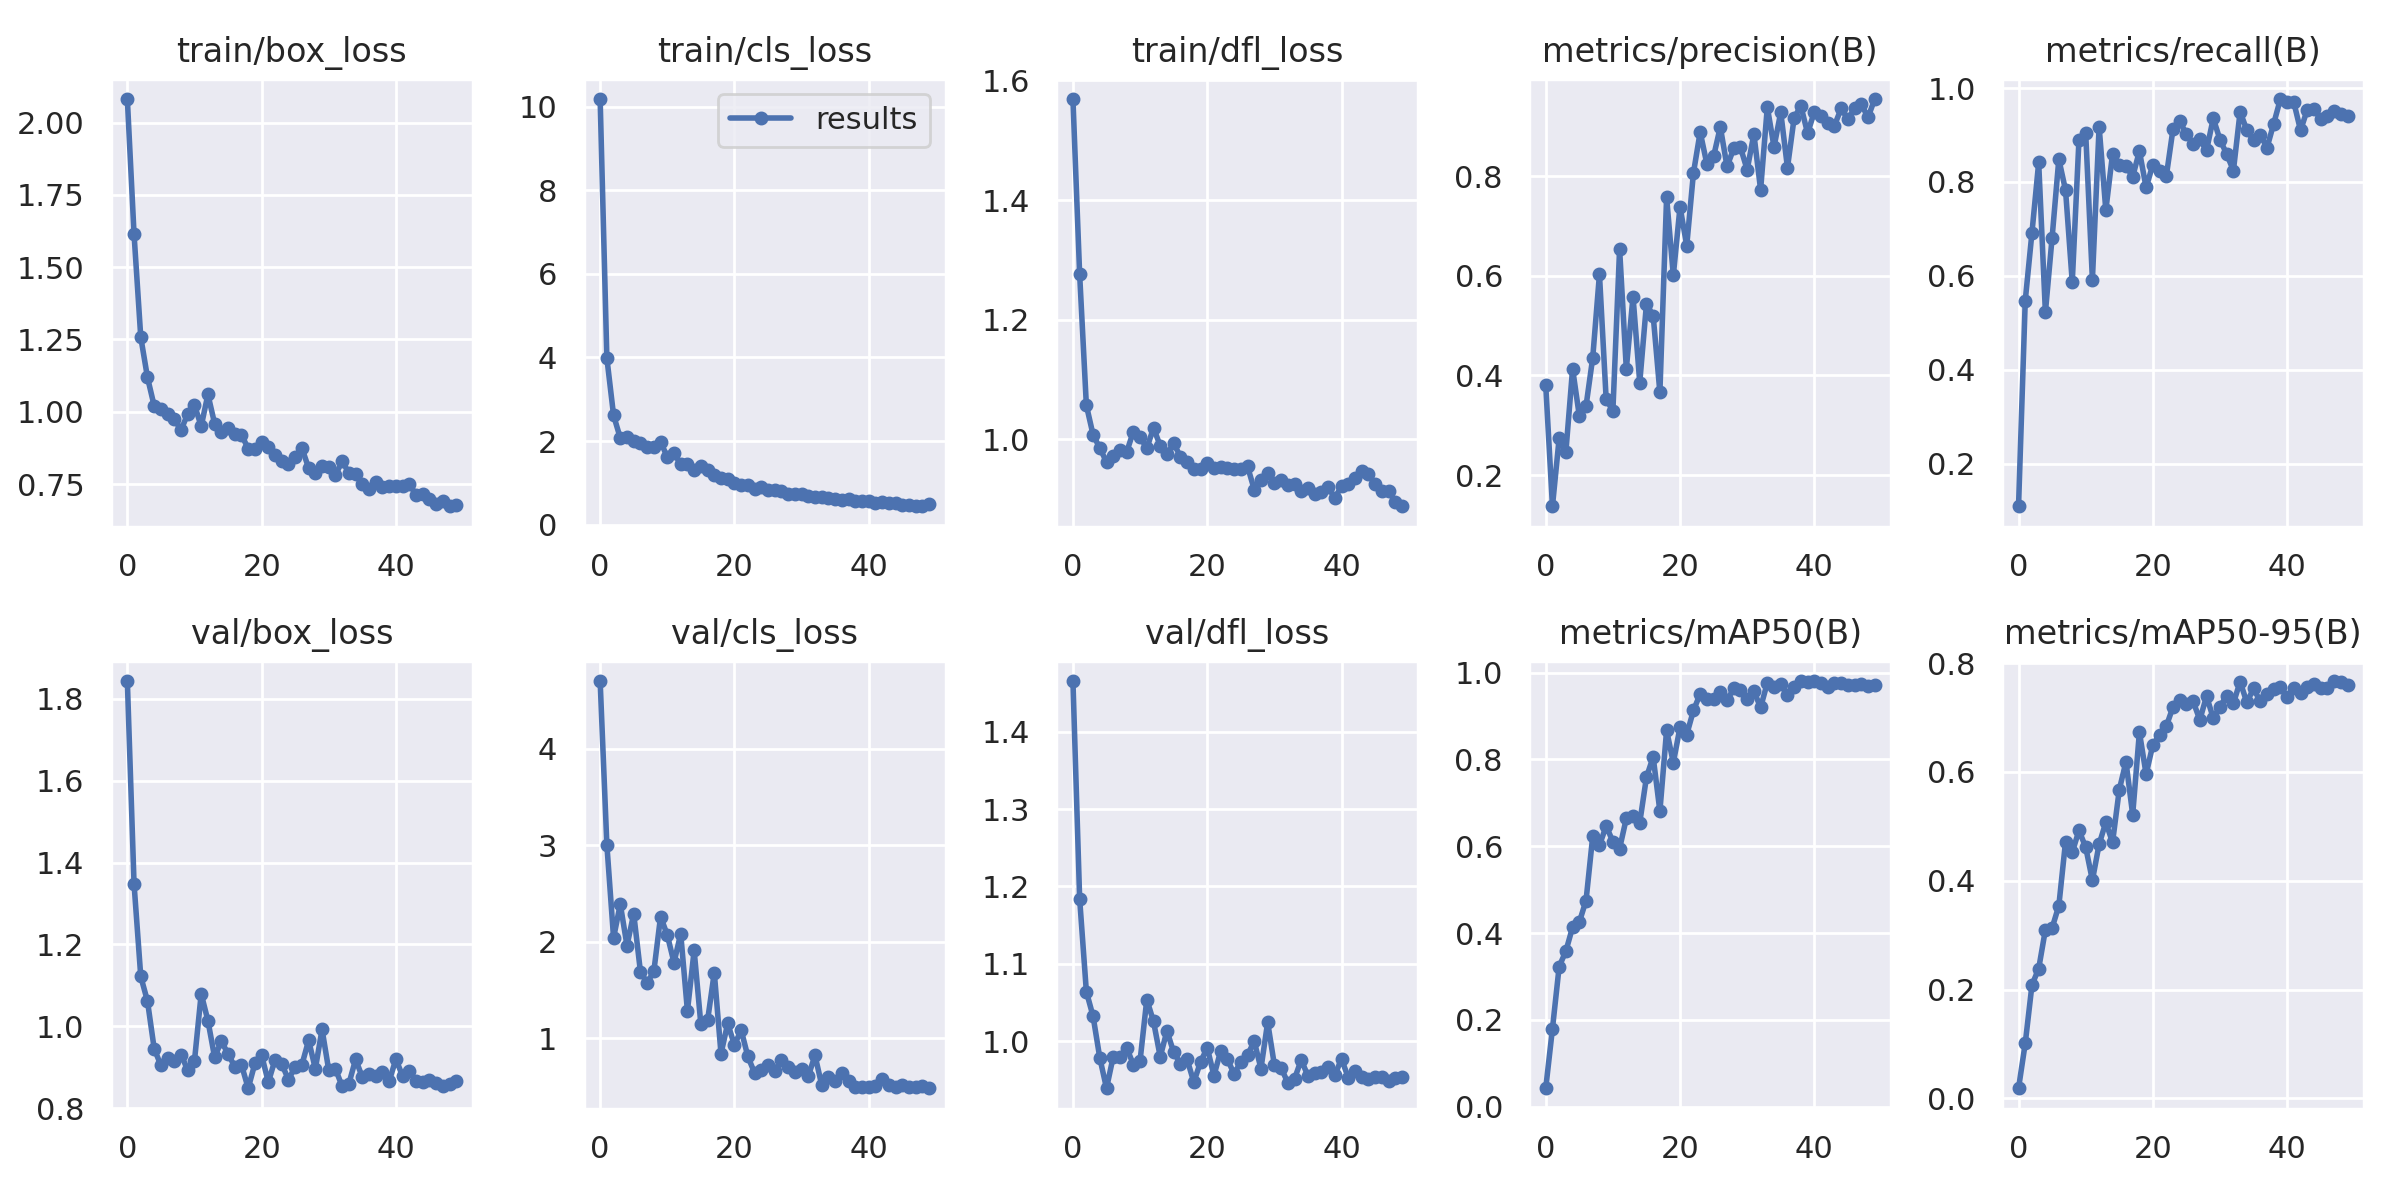

In [6]:
Image('/content/runs/detect/train/results.png', width=900)

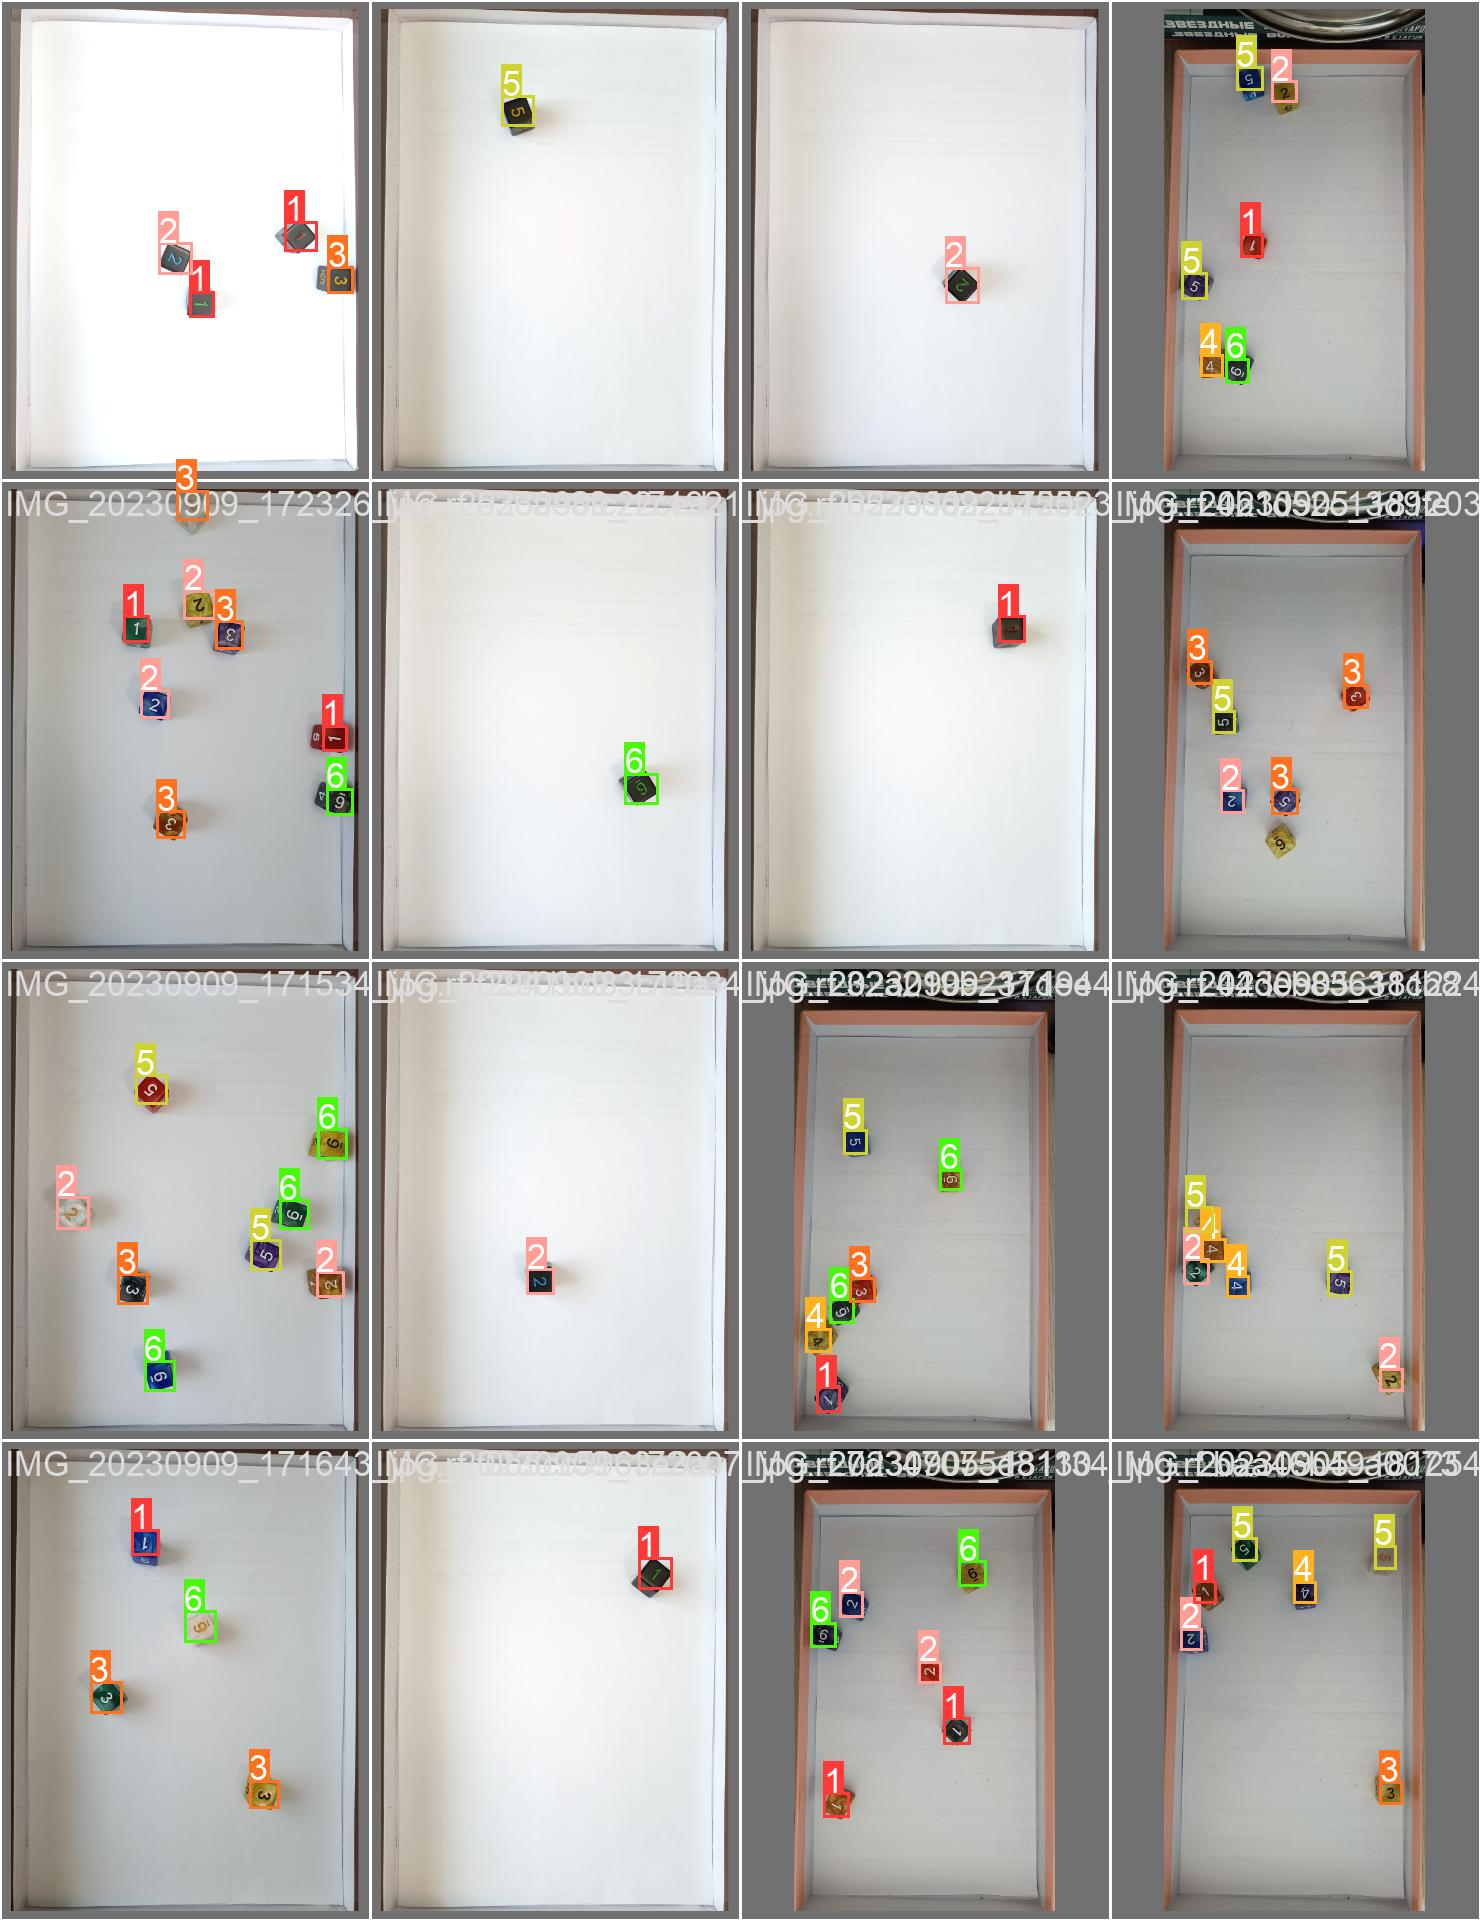

In [7]:
Image('/content/runs/detect/train/val_batch0_labels.jpg', width=900)

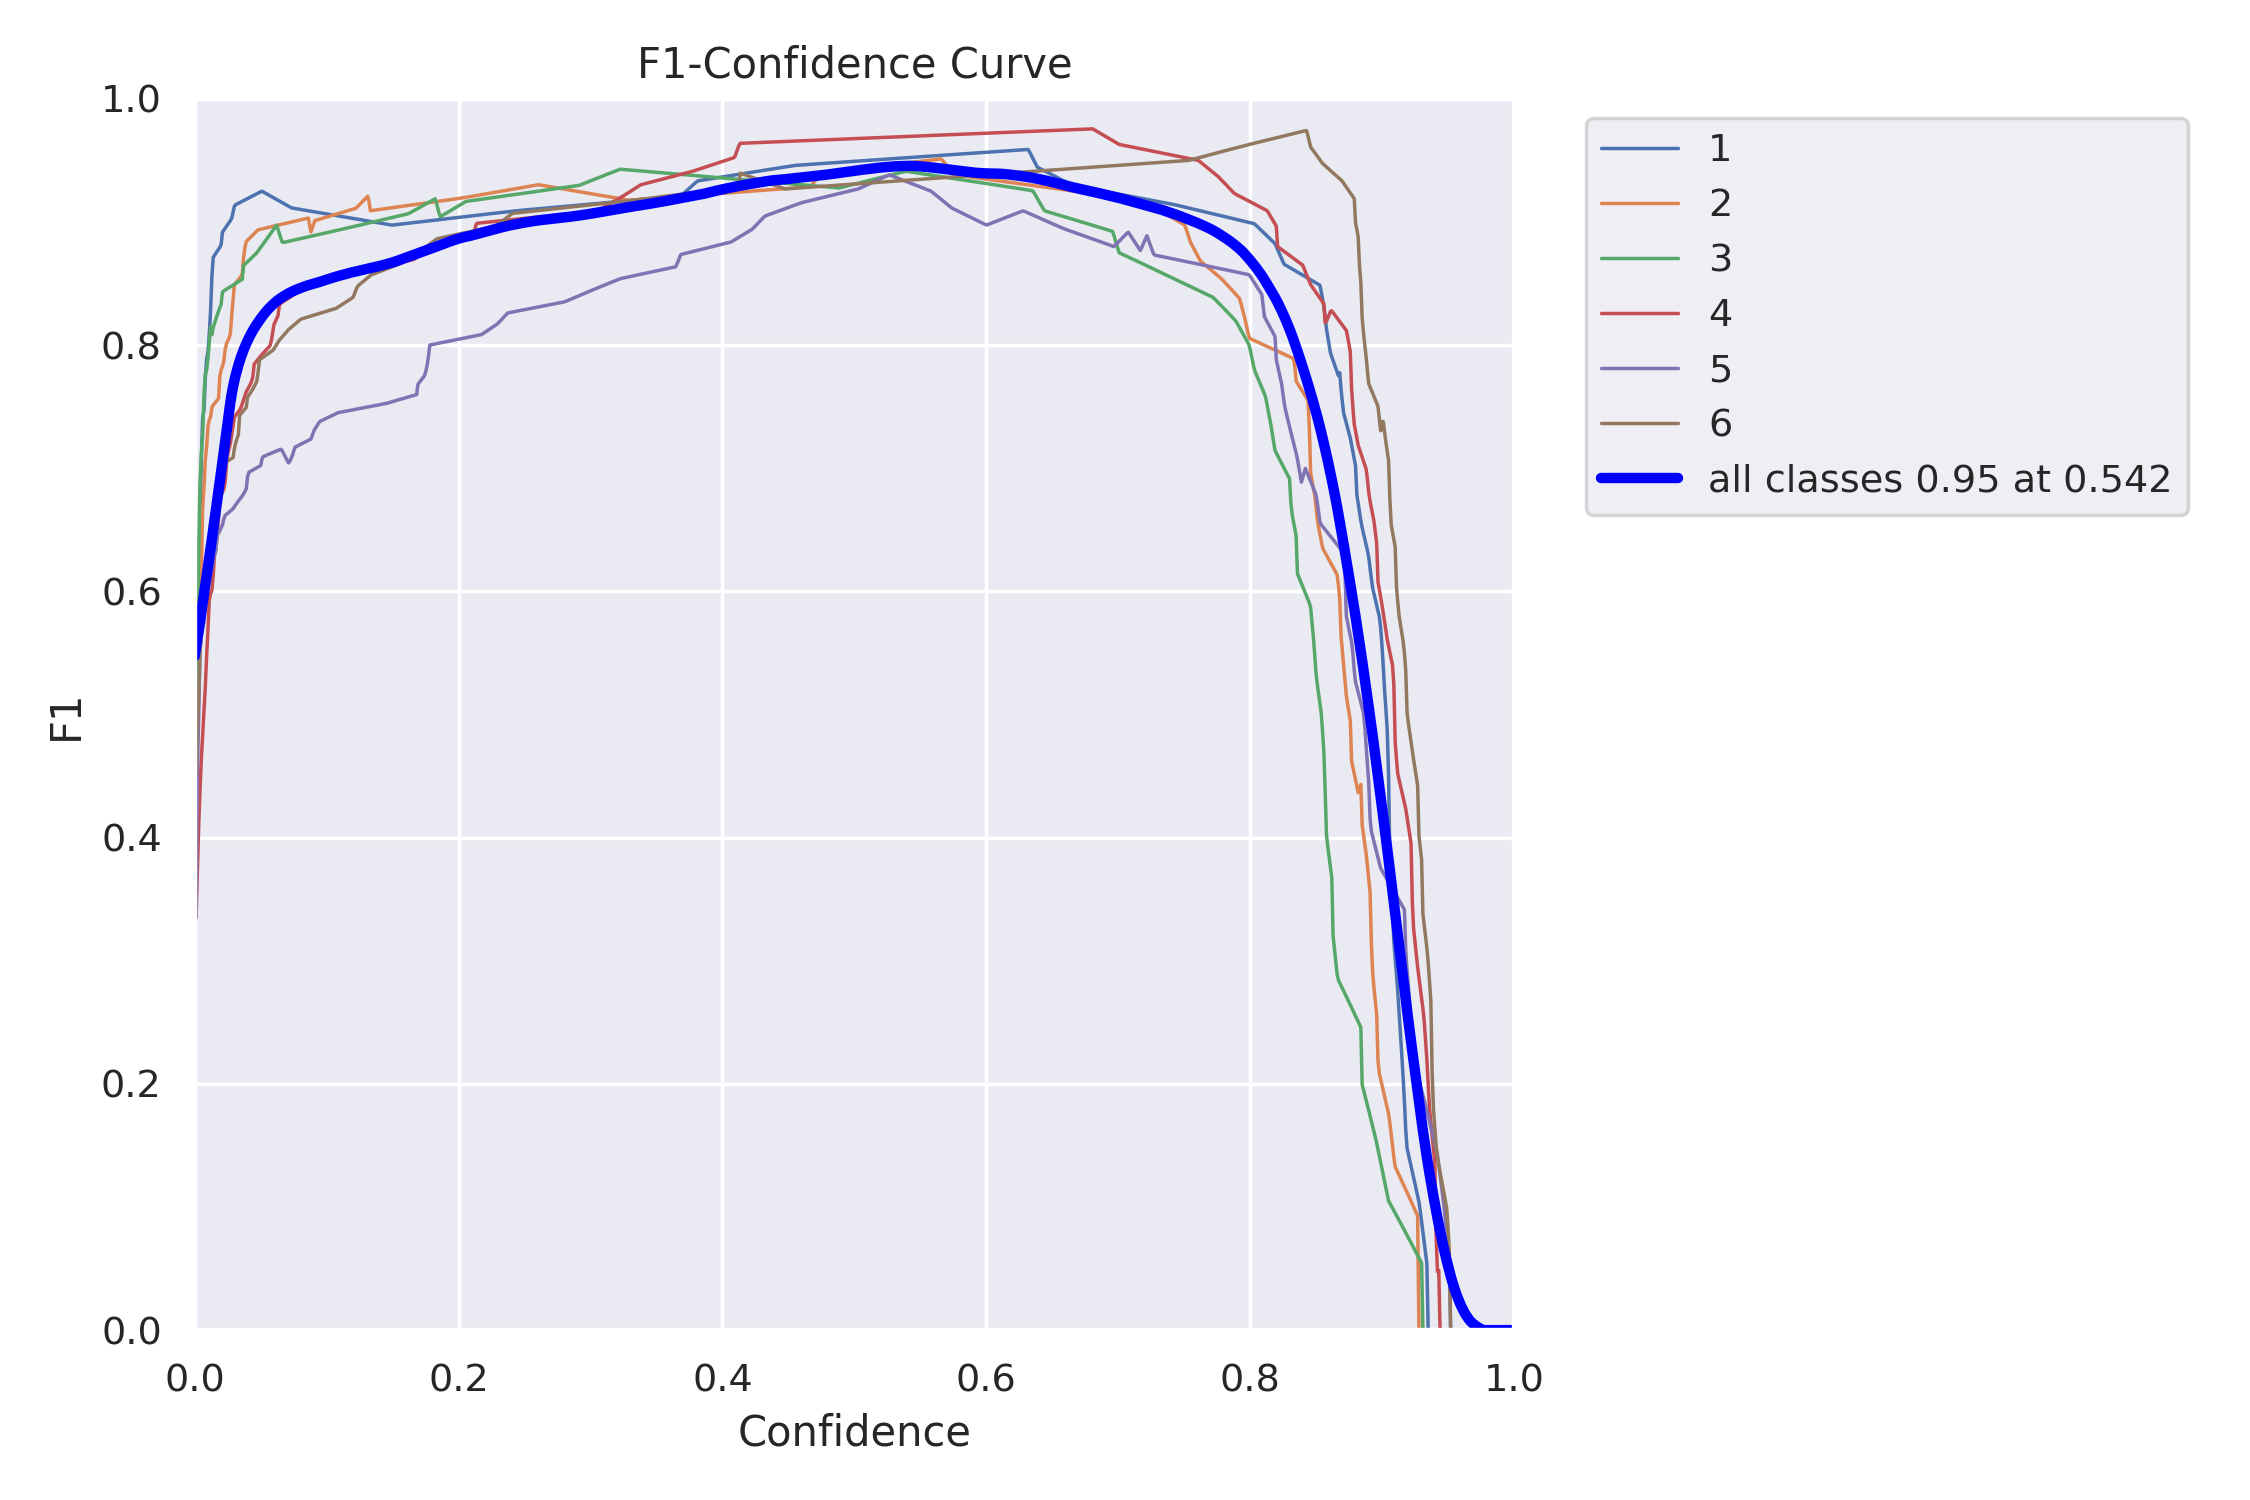

In [8]:
Image('/content/runs/detect/train/F1_curve.png', width=900)

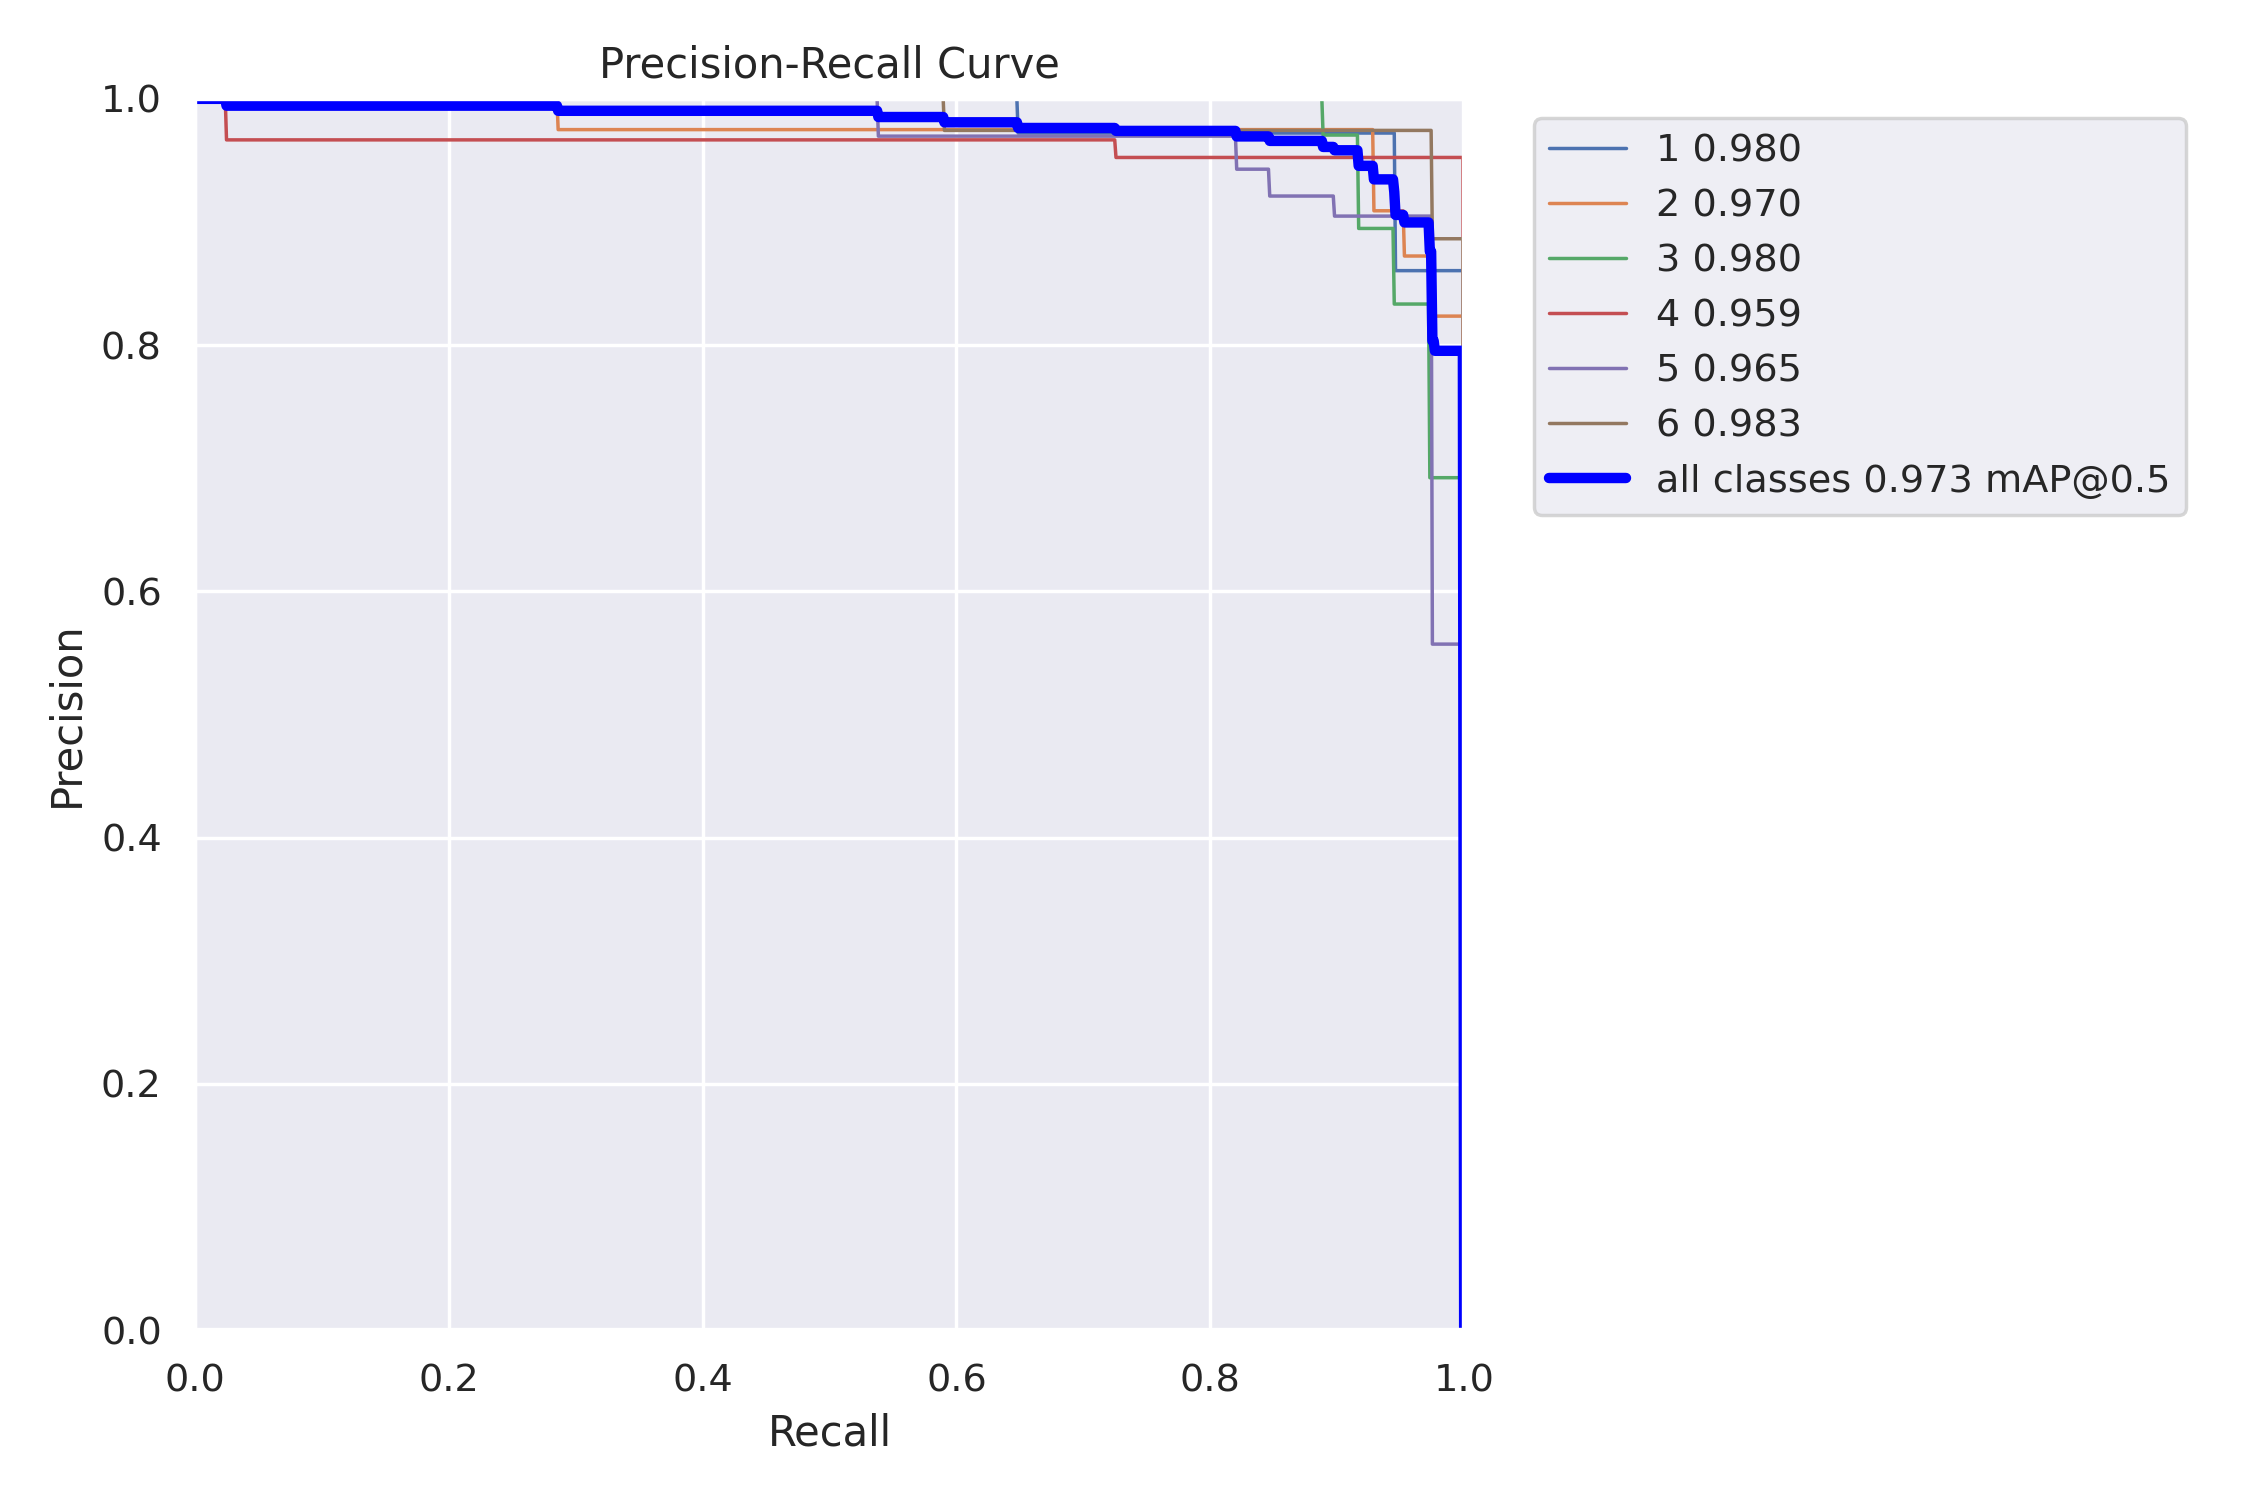

In [9]:
Image('/content/runs/detect/train/PR_curve.png', width=900)

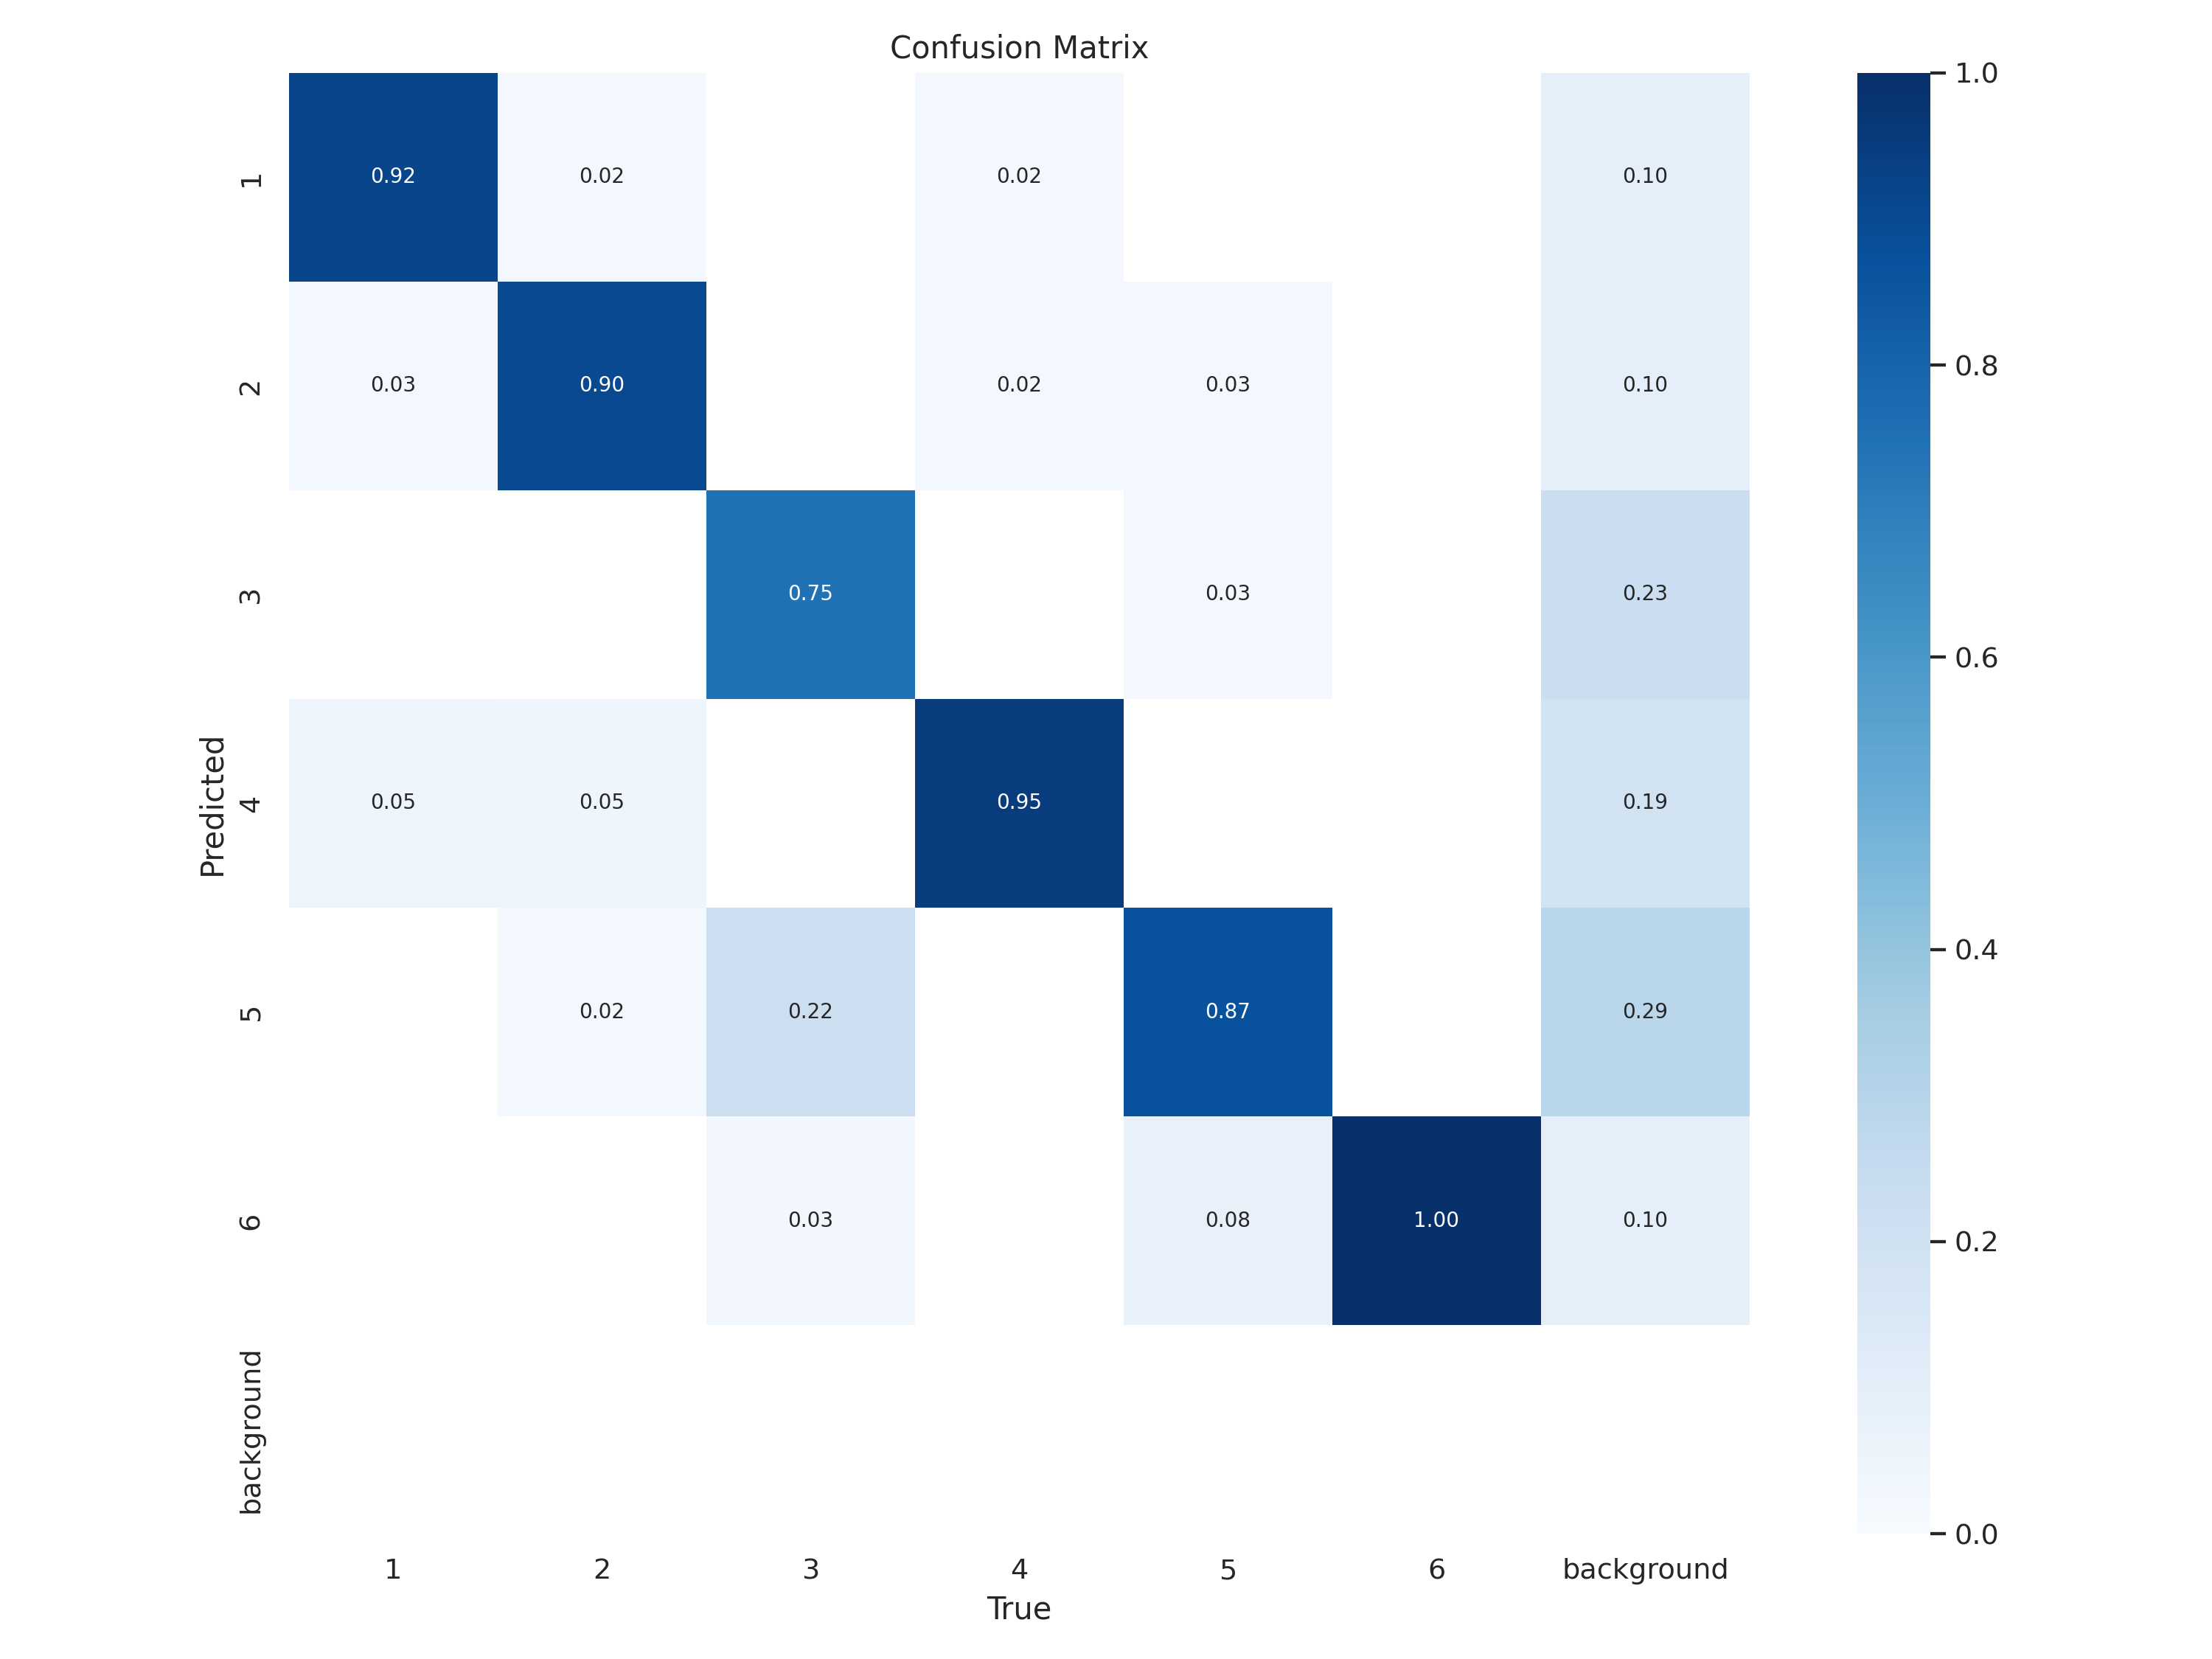

In [10]:
Image('/content/runs/detect/train/confusion_matrix.png', width=900)

# Model Evaluation
## Static Images

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.542 source=/content/valid/images save=True

2023-09-12 11:18:39.044752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 11:18:39.961706: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/50 /content/valid/images/IMG_20230905_180348_jpg.rf.7ae0105b30cfb6987cd136d3759866c1.jpg: 800x480 1 3, 1 4, 1 6, 128.7ms
image 2/50 /content/valid/images/IMG_20230905_180402_jpg.rf.1a9ef03ba2cf2da49f502ea175a79717.jpg: 800x480 1 2, 1 3, 1 5, 30.4ms
image 3/50 /content/valid/images/IMG_20230905_180408_jpg.rf.0fd10d6ce8232ed9d5e65fcdc211cc7a.jpg: 800x480 1 1, 1 2, 1 6, 15.6ms
image 4/50 

In [12]:
import pathlib

VAL_IMG_PATH_YOLO8 = pathlib.Path('/content/runs/detect/predict')

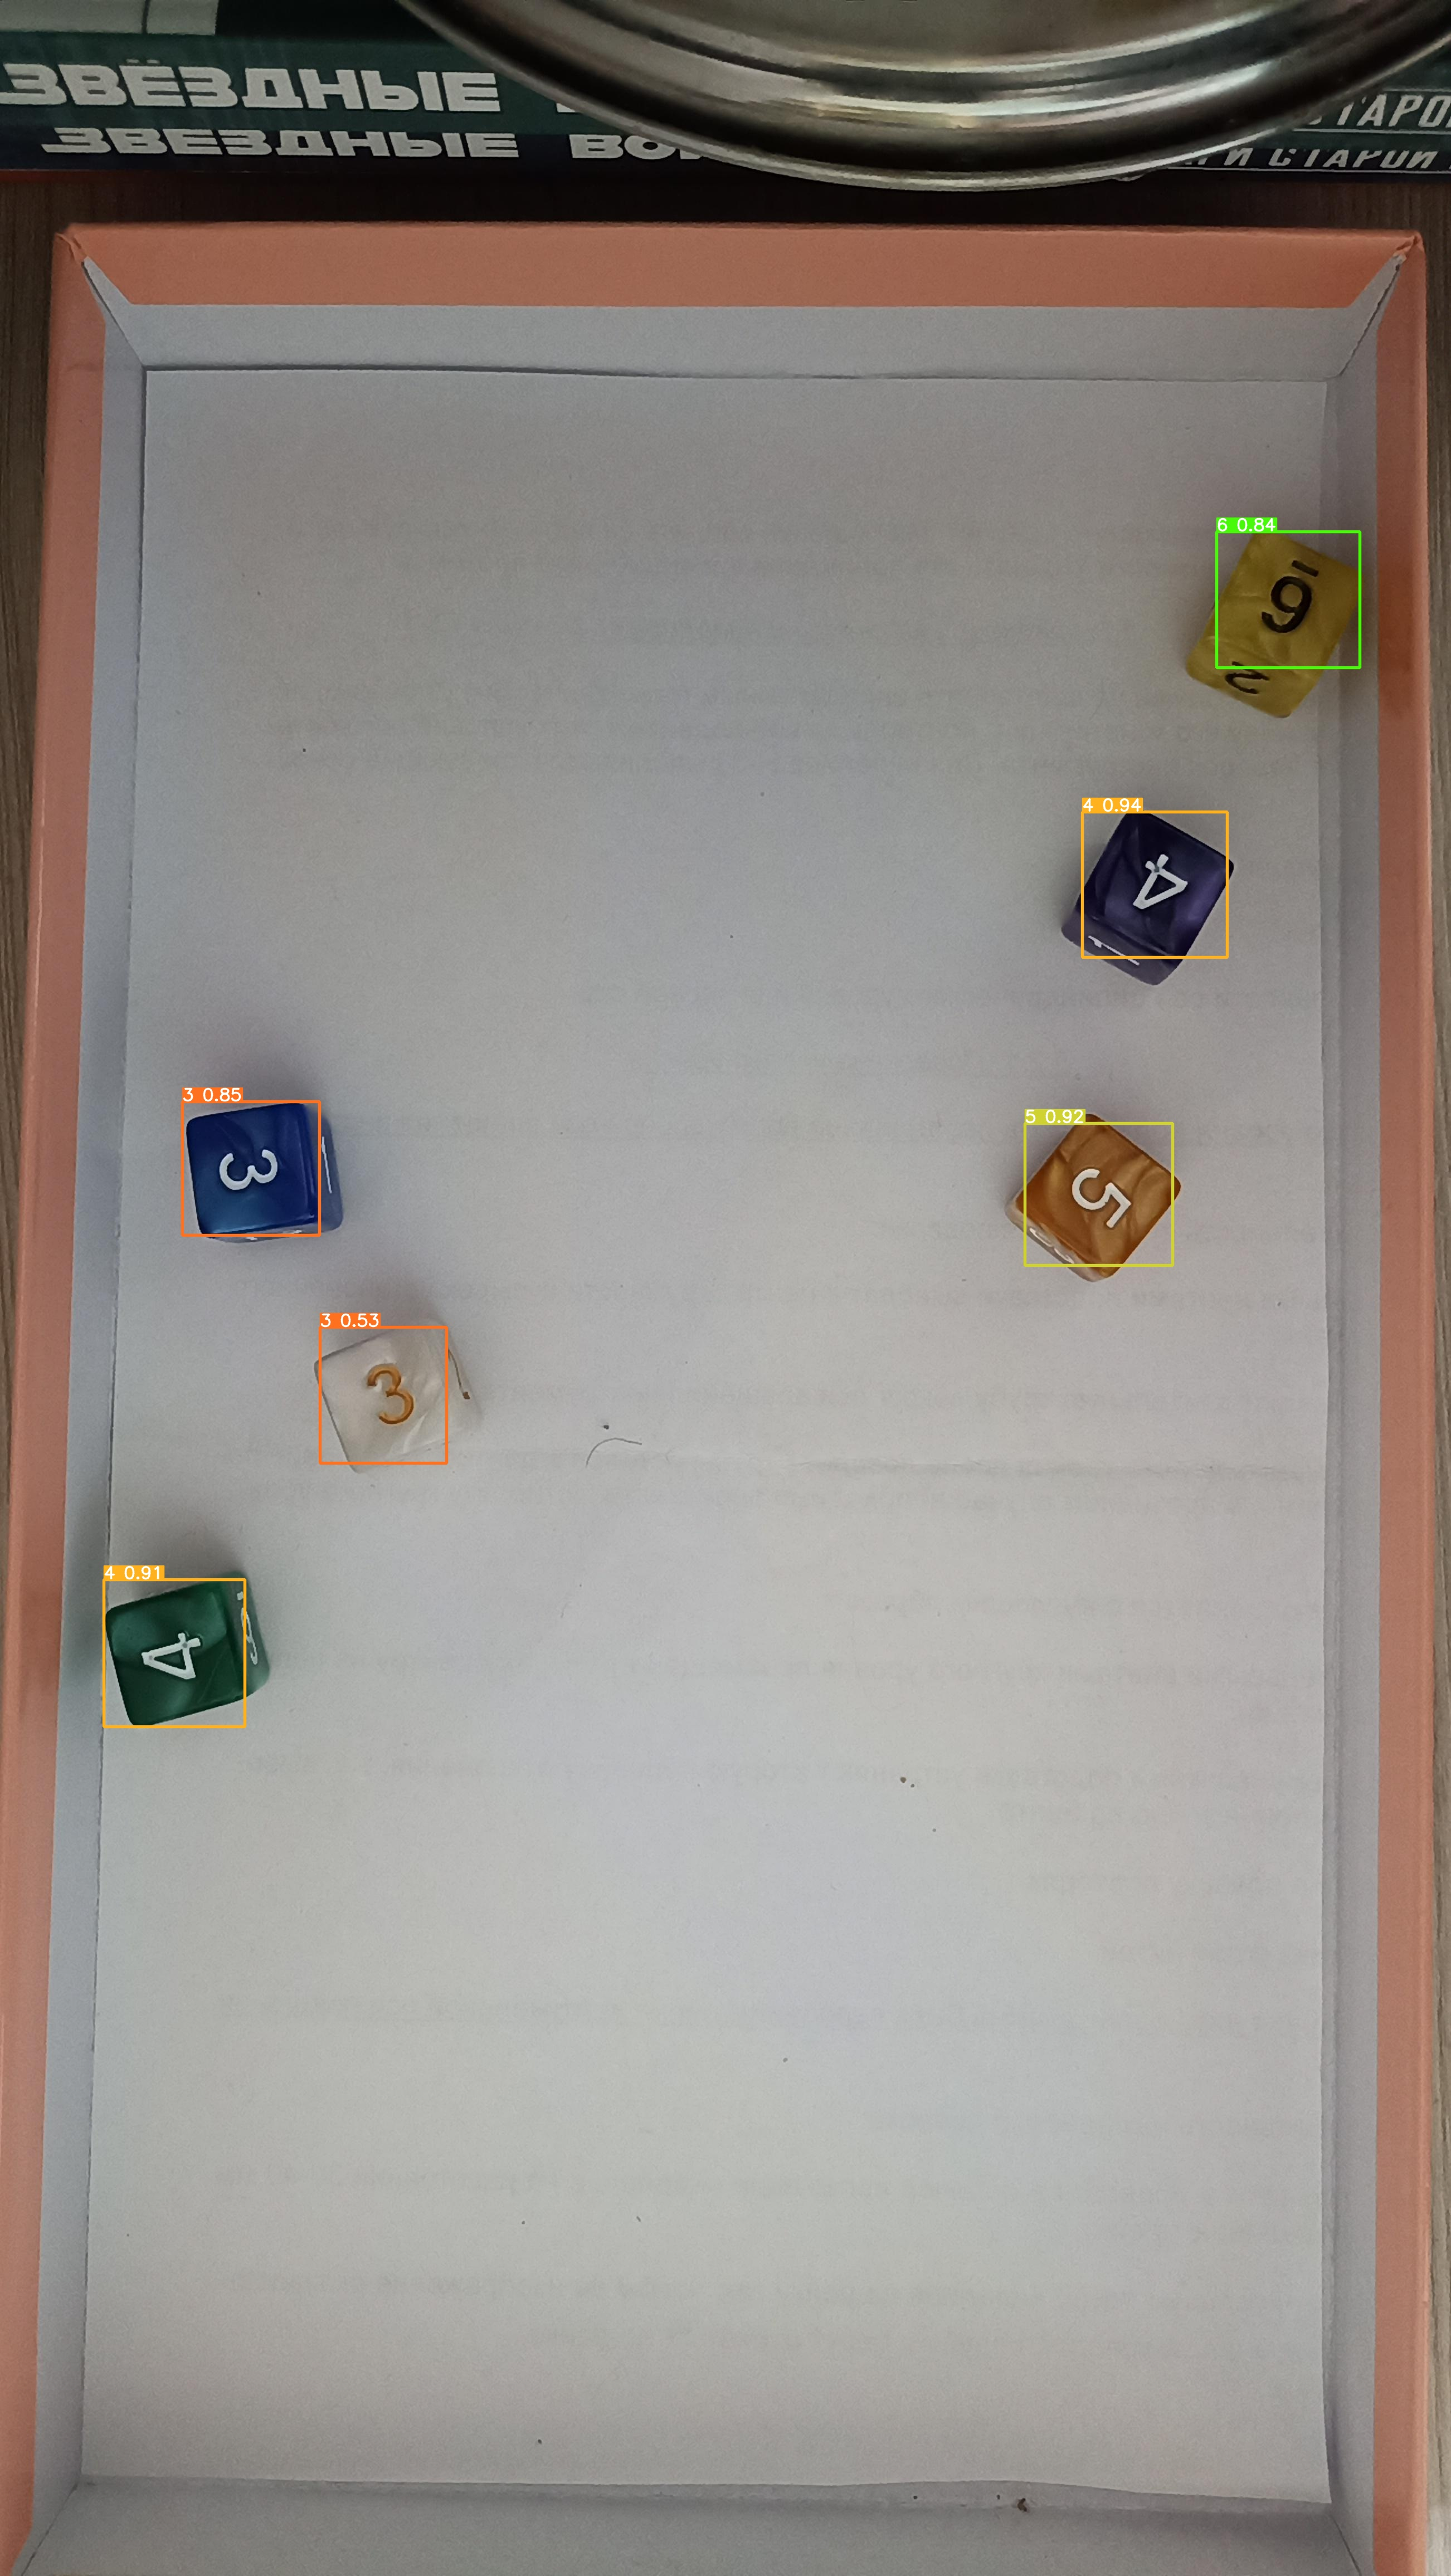

In [13]:
import random

Image(filename=random.sample(list(VAL_IMG_PATH_YOLO8.glob('*.jpg')), k=1)[0], width=900)

## Video evaluation

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/videos imgsz=1280 save=True conf=0.542

2023-09-12 03:22:32.560180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 03:22:33.891373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
video 1/4 (1/123) /content/videos/Numbers_1.mp4: 1280x736 59.5ms
video 1/4 (2/123) /content/videos/Numbers_1.mp4: 1280x736 29.2ms
video 1/4 (3/123) /content/videos/Numbers_1.mp4: 1280x736 29.2ms
video 1/4 (4/123) /content/videos/Numbers_1.mp4: 1280x736 29.2ms
video 1/4 (5/123) /content/videos/Numbers_1.mp4: 1280x736 29.2ms
video 1/4 (6/123) /content/videos/Numbers_1.mp4: 1280x736 27.1ms
video 